In [5]:
using Pkg

Pkg.add("DrWatson")

Pkg.activate("MathScience")
Pkg.instantiate()

using DrWatson
@quickactivate "MathScience"



LoadError: InterruptException:

In [6]:
include("style.jl")

darken_color (generic function with 2 methods)

In [7]:
using DynamicalSystems, PyPlot

using FFTW, Statistics

┌ Warning: Direct propagation of keyword arguments to DifferentialEquations.jl is deprecated.
│ From now on pass any DiffEq-related keywords as a `NamedTuple` using the
│ explicit keyword `diffeq` instead.
└ @ DynamicalSystemsBase ~/.julia/packages/DynamicalSystemsBase/nNJRo/src/core/continuous.jl:181
┌ Warning: Direct propagation of keyword arguments to DifferentialEquations.jl is deprecated.
│ From now on pass any DiffEq-related keywords as a `NamedTuple` using the
│ explicit keyword `diffeq` instead.
└ @ DynamicalSystemsBase ~/.julia/packages/DynamicalSystemsBase/nNJRo/src/core/continuous.jl:181
┌ Warning: Direct propagation of keyword arguments to DifferentialEquations.jl is deprecated.
│ From now on pass any DiffEq-related keywords as a `NamedTuple` using the
│ explicit keyword `diffeq` instead.
└ @ DynamicalSystemsBase ~/.julia/packages/DynamicalSystemsBase/nNJRo/src/core/continuous.jl:181


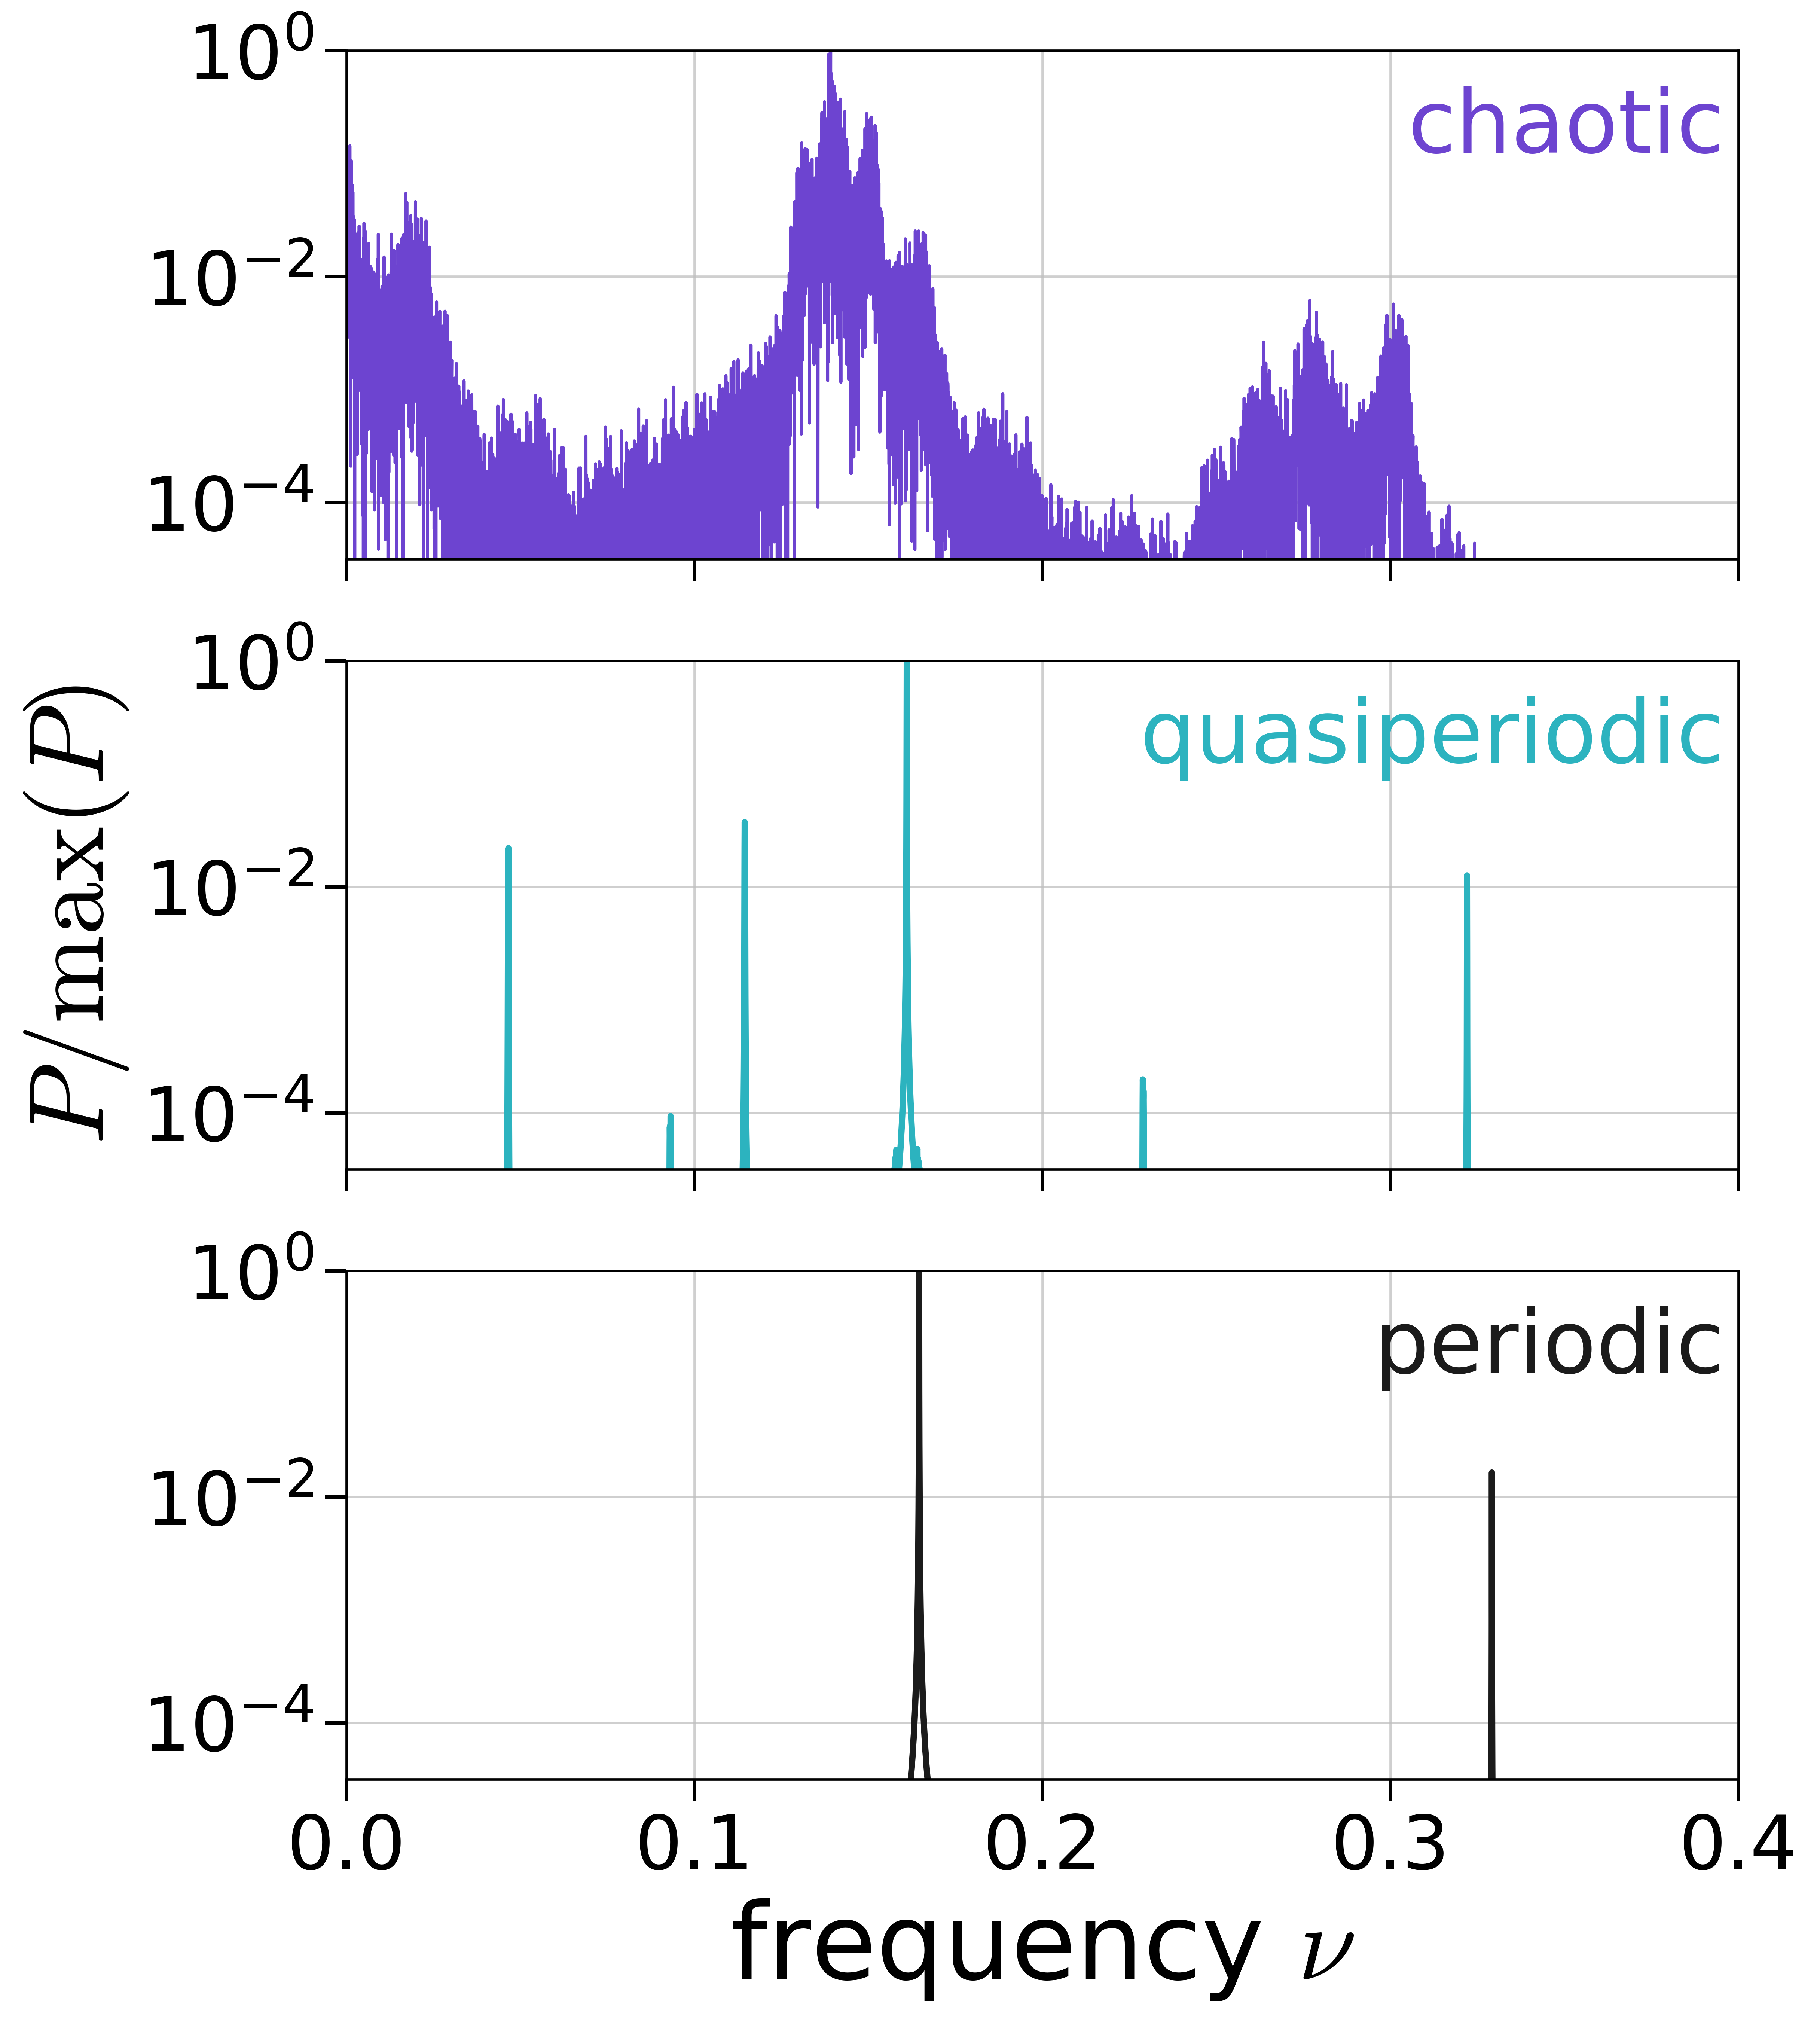

PyObject Text(0.5, 338.99999999999994, 'frequency $\\nu$')

In [8]:
using DynamicalSystems, PyPlot

u0s = (
    [0.0, -0.25, 0.42, 0.0], # chaotic
    [0.0, 0.1, 0.5, 0.0], # quasiperiodic
    [0.0, 0.30266571044921875, 0.4205654433900762, 0.0], # periodic
)

labels = (
    "chaotic",
    "quasiperiodic",
    "periodic",
)

hh = Systems.henonheiles()
fig, axs = subplots(3, 1; figsize = (figx/2, 2figy), sharex = true)

δt = 0.05

using FFTW, Statistics
for (i, u) in enumerate(u0s)
   # r = trajectory(hh, 1000.0, u; dt = 0.1)[:, 1]
    r = trajectory(hh, 30000.0, u; dt = 0.01, Δt = δt, Ttr = 10)[:, 1]
    P = abs2.(rfft(r .- mean(r)))
    P[1] = P[2]
    ν = rfftfreq(length(r))/δt
    # axs[i].plot(ν, P ./ maximum(P),
    axs[i].semilogy(ν, P ./ maximum(P),
    label = labels[i], linewidth = i == 1 ? 1.0 : 2.0, color = "C$(i-1)")
    axs[i].text(0.99, 0.8, labels[i]; ha = "right", transform = axs[i].transAxes,
    color = "C$(i-1)")
    # @show std(r)
    # r .+= 0.5randn(length(r))
    # P = abs2.(rfft(r .- mean(r)))
    # PyPlot.plot(10rfftfreq(length(r)), P ./ maximum(P),
    # lw = 1.0, alpha = 0.5, color = "C$(i-1)")
    # PyPlot.plot(r)
    # axs[i].set_yticks([])
    axs[i].set_ylim(10.0^(-4.5), 1.0)
    axs[i].set_yticks(10.0 .^ (0:-2:-5))
    axs[i].set_xlim(0, 0.4)
end
axs[2].set_ylabel("\$P / \\mathrm{max}(P)\$")
axs[3].set_xlabel("frequency \$\\nu\$")
